In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['washington', 'barrow', 'leningradskiy', 'tuktoyaktuk', 'albany', 'kimbe', 'el prat de llobregat', 'lebu', 'airai', 'sao joao de pirabas']


In [22]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url and request results
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
# Set temperature from response
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country =[]
# Create for loop for temperatures in city list
for city in cities:
    try:      
        response = requests.get(query_url + city).json()
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"The temperature in {city} is {temp} F.")
        
    except:
        print('City not found')
        pass


The temperature in washington is [74.35, 42.82, 35.89, 48.2, 81.79, 74.77, 82.9, 49.17, 56.59, 86.34] F.
The temperature in barrow is [74.35, 42.82, 35.89, 48.2, 81.79, 74.77, 82.9, 49.17, 56.59, 86.34] F.
The temperature in leningradskiy is [74.35, 42.82, 35.89, 48.2, 81.79, 74.77, 82.9, 49.17, 56.59, 86.34] F.
The temperature in tuktoyaktuk is [74.35, 42.82, 35.89, 48.2, 81.79, 74.77, 82.9, 49.17, 56.59, 86.34] F.
The temperature in albany is [74.35, 42.82, 35.89, 48.2, 81.79, 74.77, 82.9, 49.17, 56.59, 86.34] F.
The temperature in kimbe is [74.35, 42.82, 35.89, 48.2, 81.79, 74.77, 82.9, 49.17, 56.59, 86.34] F.
The temperature in el prat de llobregat is [74.35, 42.82, 35.89, 48.2, 81.79, 74.77, 82.9, 49.17, 56.59, 86.34] F.
The temperature in lebu is [74.35, 42.82, 35.89, 48.2, 81.79, 74.77, 82.9, 49.17, 56.59, 86.34] F.
The temperature in airai is [74.35, 42.82, 35.89, 48.2, 81.79, 74.77, 82.9, 49.17, 56.59, 86.34] F.
The temperature in sao joao de pirabas is [74.35, 42.82, 35.89, 4

In [24]:
cities_df = pd.DataFrame({'Cities': cities, 'Latitude': lats, 'Longitude': lngs, 'Max Temperature': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country, 'Date': date})
cities_df

,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,washington,38.612744,-91.068242,73.89,26,100,3.20,US,1627404624
1,barrow,83.497291,-156.870956,42.82,93,90,9.22,US,1627404624
2,leningradskiy,85.179396,178.633670,35.89,98,100,4.72,RU,1627404624
3,tuktoyaktuk,87.348126,-133.156524,48.20,87,90,8.05,CA,1627404625
4,albany,-80.791137,120.641077,86.61,58,9,1.01,US,1627404620
5,kimbe,-5.632325,149.685599,74.77,92,30,3.13,PG,1627404625
6,el prat de llobregat,40.834283,2.386207,90.77,69,0,14.97,ES,1627404626
7,lebu,-36.478361,-102.968161,49.17,65,1,23.20,CL,1627404626
8,airai,7.496703,141.041157,56.59,79,29,3.00,TL,1627404626
9,sao joao de pirabas,-0.507611,-47.062460,86.34,60,45,8.95,BR,1627404627


In [20]:
cities_df.to_csv("../cities_output_student.csv", encoding="utf-8", index=False) 

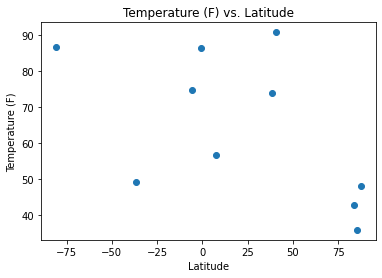

In [36]:
# Temperature (F) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Max Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature (F) vs. Latitude')
plt.savefig("Temperature.png")

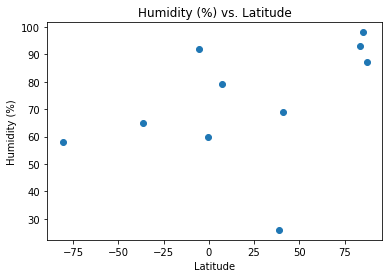

In [35]:
# Humidity (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude')
plt.savefig("Humidity.png")

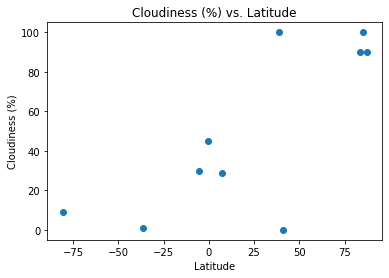

In [34]:
# Cloudiness (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude')
plt.savefig("Cloudiness.png")

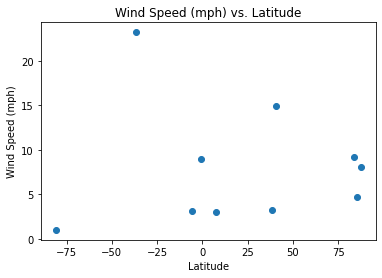

In [33]:
# Wind Speed (mph) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs. Latitude')
plt.savefig("Wind Speed.png")

In [38]:
# # Create Northern Hemisphere dataframe
northern_hem_df = cities_df.loc[cities_df['Latitude'].astype(float) < 0, :]
northern_hem_df

,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
4,albany,-80.791137,120.641077,86.61,58,9,1.01,US,1627404620
5,kimbe,-5.632325,149.685599,74.77,92,30,3.13,PG,1627404625
7,lebu,-36.478361,-102.968161,49.17,65,1,23.20,CL,1627404626
9,sao joao de pirabas,-0.507611,-47.062460,86.34,60,45,8.95,BR,1627404627


In [39]:
# Create Southern Hemisphere dataframe
southern_hem_df = cities_df.loc[cities_df['Latitude'].astype(float) > 0, :]
southern_hem_df

,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,washington,38.612744,-91.068242,73.89,26,100,3.20,US,1627404624
1,barrow,83.497291,-156.870956,42.82,93,90,9.22,US,1627404624
2,leningradskiy,85.179396,178.633670,35.89,98,100,4.72,RU,1627404624
3,tuktoyaktuk,87.348126,-133.156524,48.20,87,90,8.05,CA,1627404625
6,el prat de llobregat,40.834283,2.386207,90.77,69,0,14.97,ES,1627404626
8,airai,7.496703,141.041157,56.59,79,29,3.00,TL,1627404626


Text(0.5, 1.0, 'Max Temperature (F) vs Latitude')

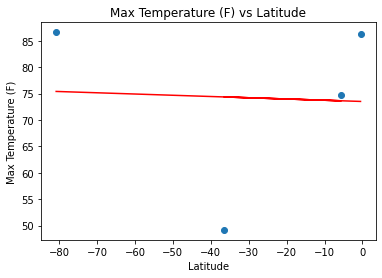

In [50]:
# Northern HemispherMax Temp vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Max Temperature'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature (F) vs Latitude')

Text(0.5, 1.0, 'Max Temperature (F) vs Latitude')

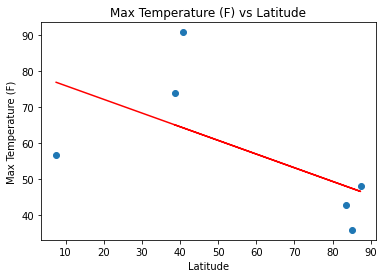

In [56]:
# Max Temp vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Max Temperature'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature (F) vs Latitude')

Text(0.5, 1.0, 'Humidity (%) vs Latitude')

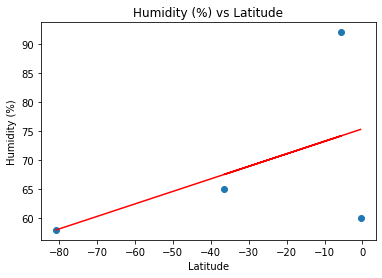

In [55]:
# Humidity vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude')

Text(0.5, 1.0, 'Cloudiness (%) vs Latitude')

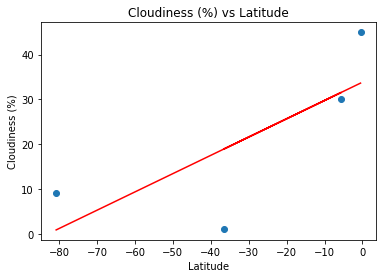

In [54]:
# Cloudiness vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude')

Text(0.5, 1.0, 'Wind Speed (mph) vs Latitude')

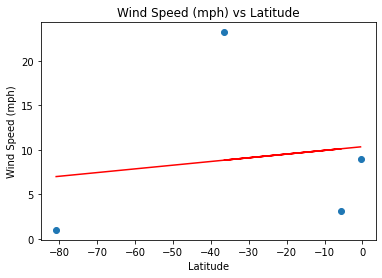

In [53]:
# Wind Speed vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Wind Speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude')